<a href="https://colab.research.google.com/github/biaoqingbao/OMG/blob/master/OMG_work_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Make sure you have connected to GPU at the first place!

In [ ]:
#@title **Install Libraries**
%%capture
!pip install git+https://github.com/tbereau/auto_martini

In [ ]:

#@title **Step 01 Load Installed Gromacs and Membrane**
%%capture
#gromacs
!wget -O local.tar https://drive.usercontent.google.com/download?id=17ApbSr7uDgZHv8Y-43tMlUxPf7tCww65&export=download&authuser=0
!tar -xvf /content/local.tar
!cp -r /content/usr/local/gromacs/ /usr/local/

!/usr/local/gromacs/bin/gmx -version


#membrane

!wget -O membrane.tar https://drive.usercontent.google.com/download?id=1Tz6ArJkR4-oHLwGh9Ya7cC23GIlVN5aR&export=download&authuser=0
!tar -xvf /content/membrane.tar

In [ ]:
#@title **Step 02 Enter target SMILES code >> get itp gro file**


#@markdown Enter Target Abbreviation :

#@markdown e.g. heptanol as HEP
ABB = "HEP" #@param {type:"string"}


#@markdown Enter Target SMILES code:
SMILES = "CCCCCCCO" #@param {type:"string"}


import os
import shutil
directory = ABB
source_folder = "/content/membrane/DIM_00/"
destination_folder = "/content/"+directory


!mkdir -p $destination_folder
!cp -r $source_folder/* $destination_folder

destination_folder_prep = destination_folder +"/prep"

os.chdir(destination_folder_prep)

import auto_martini as am
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem


mol_am, _ = am.topology.gen_molecule_smi(SMILES)
cg = am.solver.Cg_molecule(mol_am, ABB)

with open(ABB+'.itp', 'w') as f_out:
  f_out.write(cg.topout)


with open(ABB+'.gro', 'w') as f_out:
  f_out.write(cg.output_cg(molname=ABB))




with open(ABB+".gro", "r") as f:
    # Read the contents of the second text file into a list of lines
    dowgro = f.readlines()

with open('dow.gro', "w") as f:
    #newdow=[]
    for i in dowgro:
        new=i.replace(ABB, "DOW")
        f.write(new)




with open(ABB+".gro", "r") as f:
    # Read the contents of the second text file into a list of lines
    dowgro = f.readlines()

with open('upp.gro', "w") as f:
    #newdow=[]
    for i in dowgro:
        new=i.replace(ABB, "UPP")
        f.write(new)


with open(ABB+".itp", "r") as f:
    # Read the contents of the second text file into a list of lines
    dowgro = f.readlines()

with open('dow.itp', "w") as f:
    #newdow=[]
    for i in dowgro:
        new=i.replace(ABB, "DOW")
        f.write(new)

with open(ABB+".itp", "r") as f:
    # Read the contents of the second text file into a list of lines
    dowgro = f.readlines()

with open('upp.itp', "w") as f:
    #newdow=[]
    for i in dowgro:
        new=i.replace(ABB, "UPP")
        f.write(new)

Converged to solution in 1 iteration(s)


In [ ]:
#@title **Step 03 Insert Molecular**
#count bead numbers

with open("dow.gro", "r") as f:
    # Read the contents of the second text file into a list of lines
    dowgro = f.readlines()
    beadnumber = int(dowgro[1])




#insert
with open("start.gro", "r") as f:
    # Read the contents of the second text file into a list of lines
    start = f.readlines()
    newnumber = 21783+beadnumber*2
    newnumberstr = str(newnumber)
    new=start[1].replace('21785',newnumberstr)
    beadnumber1 = beadnumber +1
    beadnumber2 = beadnumber +2


with open("upp.gro", "r") as f:
    # Read the contents of the second text file into a list of lines
    upp = f.readlines()
    uppsit = []
    for i in range(2,beadnumber2):
        uppx = '{0:.3f}'.format(float(upp[i][22:28])+4.791)
        uppy = '{0:.3f}'.format(float(upp[i][30:36])+4.791)
        uppz = '{0:.3f}'.format(float(upp[i][38:44])+10.364)
        beads = upp[i][12:15]
        n = str(6672+i)
        atom_n = str(21782+i)
        uppsite = ' '+n+'UPP'+'    '+beads+atom_n+'   '+uppx+'   '+uppy+'  '+uppz
        uppsit.append(uppsite)


with open("dow.gro", "r") as f:
    # Read the contents of the second text file into a list of lines
    dow = f.readlines()
    dowsit = []
    for i in range(2,beadnumber2):
        dowx = '{0:.3f}'.format(float(dow[i][22:28])+4.791)
        dowy = '{0:.3f}'.format(float(dow[i][30:36])+4.791)
        dowz = '{0:.3f}'.format(float(dow[i][38:44])+1.093)
        beads = dow[i][12:15]
        n = str(6672+beadnumber+i)
        atom_n = str(21782+beadnumber+i)
        dowsite = ' '+n+'DOW'+'    '+beads+atom_n+'   '+dowx+'   '+dowy+'   '+dowz
        dowsit.append(dowsite)
#remember change to start.gro
with open('start.gro', "w") as f:
    f.write(start[0])
    f.write(new)
    for i in range(2,21785):
        f.write(start[i])
    for i in uppsit:
        f.write(i+'\n')
    for i in dowsit:
        f.write(i+'\n')
    f.write(start[-1])


#gro to top
with open("start.gro", "r") as f:
    # Read the contents of the second text file into a list of lines
    lines2 = f.readlines()
lines3 = lines2[2:-1]

lines = []
for i in lines3:
    if i[5:9] != 'ION ':
        lines.append(i[5:9])
    elif i[12:15] == ' CL':
        lines.append('CL  ')
    elif i[12:15] == ' NA':
        lines.append('NA  ')

lst = lines
prev_elem = lst[0]
count = 1
grolist = []
for elem in lst[1:]:
    if elem == prev_elem:
        count += 1
    else:
        grolist.append(prev_elem+' ' + str(count))
        prev_elem = elem
        count = 1
grolist.append(prev_elem+' ' + str(count))  # 最后一行


toplist = []
for i in grolist:
    if i[0:5] == "DPCE ":
        dpce = int(i[5:])//9
        toplist.append('DPCE '+str(dpce))
    if i[0:5] == "CHOL ":
        chol = int(i[5:])//8
        toplist.append('CHOL '+str(chol))
    if i[0:5] == "BCN  ":
        bcn = int(i[5:])//6
        toplist.append('BCN '+str(bcn))
    if i[0:5] == "PW   ":
        pw = int(i[5:])//3
        toplist.append('PW '+str(pw))
    if i[0:5] == "UPP  ":
        upp = int(i[5:])//beadnumber
        toplist.append('UPP '+str(upp))
    if i[0:5] == "DOW  ":
        dow = int(i[5:])//beadnumber
        toplist.append('DOW '+str(dow))
    if i[0:5] == "NA   ":
        na = int(i[5:])//1
        toplist.append('NA '+str(na))
    if i[0:5] == "CL   ":
        cl = int(i[5:])//1
        toplist.append('CL '+str(cl))

with open('system.top', "w") as f:
    opening = """#include "martini_v2.2P.itp"
#include "martini_v2.0_lipids_all_201506.itp"
#include "martini_v2.0_ions.itp"
#include "CHOL.itp"
; Then ITP of specific molecule
#include "upp.itp"
#include "dow.itp"

[ system ]
; name
Martini system

[ molecules ]
; name        number"""
    f.write(opening + "\n")
    for i in toplist:
        f.write(i+"\n")

In [ ]:
#@title **Step 04 GROMACS Calulation Preparation**

# prep
os.chdir(destination_folder_prep)
!bash run_prep.sh

In [ ]:
#@title **Step 05 GROMACS Calulation Production**

#prod
import os
destination_folder_prod = destination_folder + '/prod'
os.chdir(destination_folder_prod)

!chmod +x get_distances.sh
!bash run_prod.sh

In [ ]:
#@title **Step 06 GROMACS Calulation Umbrella Sampling**
#umb
import os
destination_folder_umb = destination_folder + '/umb'
os.chdir(destination_folder_umb)

#os.chdir('/content/DIM_C1-Nda/umb')
!chmod +x calc_umb.sh
!chmod +x analysis.sh
!python gen_coordseldat.py
!bash calc_umb.sh
!bash analysis.sh

In [ ]:
#@title **Result: LogKp Calculation**
#average
os.chdir(destination_folder_umb)

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d


!mkdir -p /content/$ABB/Result

!cp down-pot.xvg /content/$ABB/Result
!cp upp-pot.xvg /content/$ABB/Result




destination_folder_Result = destination_folder + '/Result'
os.chdir(destination_folder_Result)


x1, y1 = np.loadtxt('upp-pot.xvg', unpack=True, comments = ['#', '@'])
x2, y2 = np.loadtxt('down-pot.xvg', unpack=True, comments = ['#', '@'])

# Define the original range of x values
xmin = max(x1[0], x2[0])
xmax = min(x1[-1], x2[-1])

# Interpolate one of the files to match the x values of the other
f2 = interp1d(x2, y2, kind='cubic', bounds_error=False, fill_value='extrapolate')
y2_interp = f2(x1)

# Average the y values at each point
y_avg = (y1 + y2_interp) / 2

# Keep only the x values within the original range
x_new = x1[(x1 >= xmin) & (x1 <= xmax)]
y_new = y_avg[(x1 >= xmin) & (x1 <= xmax)]

# Save the result to a new file
np.savetxt('average-try.xvg', np.transpose([x_new, y_new]), fmt='%f')
aver = np.transpose([x_new, y_new])

average = pd.DataFrame(aver)
average.to_csv('average-try.csv',index=None,header=None)





#LogKp
import numpy as np
import matplotlib.pyplot as plt

d = np.loadtxt('average-try.xvg')

ind_3 = np.abs(d[:, 0] - 3).argmin()#https://www.youtube.com/watch?v=66fJfvuMJw4 #3nm之后的最小值
ind_4 = np.abs(d[:, 0] - 4).argmin()# 取最小值的索引   #在3nm到4nm 之间取最小值   #4nm 之后的最小值

d[:, 1] = d[:, 1] - np.mean(d[ind_3: ind_4, 1]) #所有y -减去 两个最小值之间取平均
d[:, 1] = d[:, 1] * 4.184 * 1000  #kcal to J
d[:, 1] = np.exp(d[:, 1]*(1/310.15/8.314)) # at 313 K ——————————J to K——————————————————————————————————
d[:, 0] = d[:, 0]*(10**-7) # nm -> cm
I = np.trapz(d[:, 1], x = d[:, 0])#积分
P_inv = I/(0.85*10**-6)
P = 1/P_inv


print(ABB+ " LogKp =", round(d[:, 1][0],2))

In [ ]:
#@title **Result: LogKp Value**
print(ABB+ " LogKp =", round(d[:, 1][0],2))

In [ ]:

#@title **Result: PMG Profile**

xvg_file = 'average-try.xvg'



data = np.loadtxt(xvg_file)
x = data[:,0]
#y = data[:,1]


d = np.loadtxt(xvg_file)

ind_3 = np.abs(d[:, 0] - 3).argmin()#https://www.youtube.com/watch?v=66fJfvuMJw4 #3nm之后的最小值
ind_4 = np.abs(d[:, 0] - 4).argmin()# 取最小值的索引   #在3nm到4nm 之间取最小值   #4nm 之后的最小值

y = d[:, 1] - np.mean(d[ind_3: ind_4, 1]) #所有y -减去 两个最小值之间取平均



#ax = plt.subplot()
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.xlim(xmin = 0, xmax = 5)
plt.grid(True)
plt.xlabel(" ξ(nm)")#,fontsize=10)
plt.ylabel("E(kcal mol$^{-1}$)")#,fontsize=10)
plt.title("Umbrella Potential")#,fontsize=10)

qianhong = (230/255, 80/255, 80/255)
alpha_value = [0.2, 0.4, 0.6, 0.8, 1]
plt.plot(x, y, label=(xvg_file[0].upper() + xvg_file[1:2]),c =qianhong,alpha= alpha_value[4])#,alpha=0.2

#plt.show()
#plt.ylim(-15,20)
#plt.xlim(0,4)
plt.savefig(ABB+"-PMF.jpg",dpi=600)##刷新了才能用 不然legend不更新

In [ ]:

#@title **Example Molecule HEP(DIM_C1-Nda)**

"""
from google.colab import drive
drive.mount('/content/drive')


import os
# 更改当前工作目录到/content/auto_martini
os.chdir('/content')

!mkdir -p /content/test
!cp /content/drive/MyDrive/GROMACS-ONLINE/DIM_C1-Nda.tar /content/test
!tar -xvf /content/test/DIM_C1-Nda.tar
"""



!git clone https://github.com/biaoqingbao/OMG.git

In [ ]:
#@title **LogKp Calculation**
#average
"""
import os
# 更改当前工作目录到/content/auto_martini
os.chdir('/content')

!mkdir -p /content/test
!cp /content/drive/MyDrive/DIM_C1-Nda.tar /content/test
!tar -xvf /content/test/DIM_C1-Nda.tar

os.chdir('/content/DIM_C1-Nda/umb')
"""


os.chdir('/content/OMG/DIM_C1-Nda/umb')

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d


!mkdir -p /content/DIM_C1-Nda/Result

#!cp /content/DIM_C1-Nda/umb/c1-nda-down-pot.xvg /content/$ABB/Result
#!cp /content/DIM_C1-Nda/umb/c1-nda-upp-pot.xvg /content/$ABB/Result




destination_folder = "/content/DIM_C1-Nda"

destination_folder_Result = destination_folder + '/Result'
!mkdir -p $destination_folder_Result

!cp c1-nda-down-pot.xvg $destination_folder_Result
!cp c1-nda-upp-pot.xvg $destination_folder_Result

os.chdir(destination_folder_Result)
x1, y1 = np.loadtxt('c1-nda-upp-pot.xvg', unpack=True, comments = ['#', '@'])
x2, y2 = np.loadtxt('c1-nda-down-pot.xvg', unpack=True, comments = ['#', '@'])

# Define the original range of x values
xmin = max(x1[0], x2[0])
xmax = min(x1[-1], x2[-1])

# Interpolate one of the files to match the x values of the other
f2 = interp1d(x2, y2, kind='cubic', bounds_error=False, fill_value='extrapolate')
y2_interp = f2(x1)

# Average the y values at each point
y_avg = (y1 + y2_interp) / 2

# Keep only the x values within the original range
x_new = x1[(x1 >= xmin) & (x1 <= xmax)]
y_new = y_avg[(x1 >= xmin) & (x1 <= xmax)]

# Save the result to a new file
np.savetxt('average-try.xvg', np.transpose([x_new, y_new]), fmt='%f')
aver = np.transpose([x_new, y_new])

average = pd.DataFrame(aver)
average.to_csv('average-try.csv',index=None,header=None)








#LogKp
import numpy as np
import matplotlib.pyplot as plt

d = np.loadtxt('average-try.xvg')

ind_3 = np.abs(d[:, 0] - 3).argmin()#https://www.youtube.com/watch?v=66fJfvuMJw4 #3nm之后的最小值
ind_4 = np.abs(d[:, 0] - 4).argmin()# 取最小值的索引   #在3nm到4nm 之间取最小值   #4nm 之后的最小值

d[:, 1] = d[:, 1] - np.mean(d[ind_3: ind_4, 1]) #所有y -减去 两个最小值之间取平均
d[:, 1] = d[:, 1] * 4.184 * 1000  #kcal to J
d[:, 1] = np.exp(d[:, 1]*(1/310.15/8.314)) # at 313 K ——————————J to K——————————————————————————————————
d[:, 0] = d[:, 0]*(10**-7) # nm -> cm
I = np.trapz(d[:, 1], x = d[:, 0])#积分
P_inv = I/(0.85*10**-6)
P = 1/P_inv

In [ ]:
#@title **LogKp Value**
print("Example Molecule "+ ABB+" LogKp =", round(np.log10(P), 2))

Example Molecule HEP LogKp = 0.64


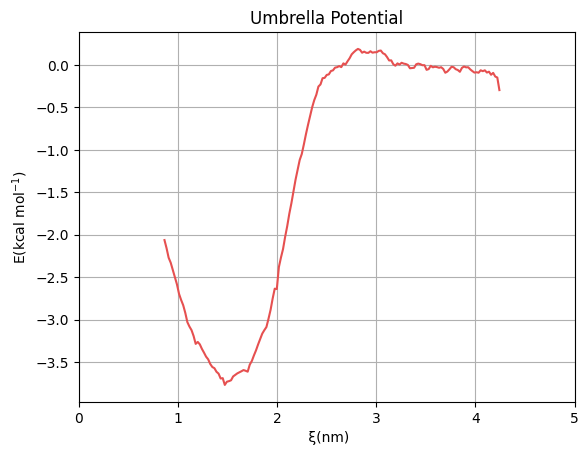

In [ ]:
#@title **PMG Profile**


xvg_file = 'average-try.xvg'



data = np.loadtxt(xvg_file)
x = data[:,0]
#y = data[:,1]


d = np.loadtxt(xvg_file)

ind_3 = np.abs(d[:, 0] - 3).argmin()#https://www.youtube.com/watch?v=66fJfvuMJw4 #3nm之后的最小值
ind_4 = np.abs(d[:, 0] - 4).argmin()# 取最小值的索引   #在3nm到4nm 之间取最小值   #4nm 之后的最小值

y = d[:, 1] - np.mean(d[ind_3: ind_4, 1]) #所有y -减去 两个最小值之间取平均



#ax = plt.subplot()
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.xlim(xmin = 0, xmax = 5)
plt.grid(True)
plt.xlabel(" ξ(nm)")#,fontsize=10)
plt.ylabel("E(kcal mol$^{-1}$)")#,fontsize=10)
plt.title("Umbrella Potential")#,fontsize=10)

qianhong = (230/255, 80/255, 80/255)
alpha_value = [0.2, 0.4, 0.6, 0.8, 1]
plt.plot(x, y, label=(xvg_file[0].upper() + xvg_file[1:2]),c =qianhong,alpha= alpha_value[4])#,alpha=0.2

#plt.show()
#plt.ylim(-15,20)
#plt.xlim(0,4)
plt.savefig(ABB+"-PMF.jpg",dpi=600)##刷新了才能用 不然legend不更新